# 屬性&描述

1. Attribute1 當天日期
2. Attribute2 氣象站的地區
3. Attribute3 最低溫度(攝氏)
4. Attribute4 最高溫度(攝氏)
5. Attribute5 降雨量 (單位: 毫米)
6. Attribute6 蒸發量
7. Attribute7 當天陽光出現的時數
8. Attribute8 最強陣風方向
9. Attrubute9 最強陣風速度 (單位: 公里/小時)
10. Attribute10 下午三點的風向
11. Attribute11 下午三點前的平均風速 (單位: 公里/小時)
12. Attribute12 下午三點的相對濕度
13. Attribute13 下午三點前的平均大氣壓(hpa)
14. Attribute14 下午三點，雲層遮蓋天空的比例 (0 完全晴朗無雲 - 8 完全多雲)
15. Attribute15 下午三點的溫度
16. Attribute16 今天有沒有下雨
17. Attribute17 明天會不會下雨(class label)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2022-data-science-hw1/ex_submit.csv
/kaggle/input/2022-data-science-hw1/train.csv
/kaggle/input/2022-data-science-hw1/test.csv


# 讀入Training Data

In [2]:
dataset = pd.read_csv("../input/2022-data-science-hw1/train.csv") # train data

print("Shape: "+ str(dataset.shape)) # 資料維度
dataset.head()

Shape: (17103, 17)


,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17
0,2008-12-04,2,9.2,28.0,0.0,NaN,NaN,NE,24.0,E,9.0,16.0,1012.8,NaN,26.5,No,No
1,2008-12-08,2,7.7,26.7,0.0,NaN,NaN,W,35.0,W,17.0,19.0,1010.1,NaN,25.5,No,No
2,2008-12-12,2,15.9,21.7,2.2,NaN,NaN,NNE,31.0,ENE,13.0,91.0,1004.2,8.0,17.0,Yes,Yes
3,2008-12-13,2,15.9,18.6,15.6,NaN,NaN,W,61.0,NNW,28.0,93.0,993.0,8.0,15.8,Yes,Yes
4,2009-01-06,2,13.7,37.9,0.0,NaN,NaN,W,52.0,WNW,26.0,8.0,1006.7,NaN,36.8,No,No


In [3]:
print("Missing data ratio: ")
print(dataset.isnull().sum() / len(dataset)) # 遺失資料占比

Missing data ratio: 
Attribute1     0.000000
Attribute2     0.000000
Attribute3     0.004151
Attribute4     0.001871
Attribute5     0.009414
Attribute6     0.432731
Attribute7     0.481261
Attribute8     0.063907
Attribute9     0.063498
Attribute10    0.025259
Attribute11    0.017892
Attribute12    0.024265
Attribute13    0.097585
Attribute14    0.406478
Attribute15    0.017190
Attribute16    0.009414
Attribute17    0.000000
dtype: float64


# 處理日期

In [4]:
# 日期只保留月份
dataset['Attribute1'] = pd.to_datetime(dataset['Attribute1'])
month = dataset['Attribute1'].dt.month
dataset.drop(labels=['Attribute1'], axis=1, inplace=True)
dataset['month'] = month
dataset.head()

,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,month
0,2,9.2,28.0,0.0,NaN,NaN,NE,24.0,E,9.0,16.0,1012.8,NaN,26.5,No,No,12
1,2,7.7,26.7,0.0,NaN,NaN,W,35.0,W,17.0,19.0,1010.1,NaN,25.5,No,No,12
2,2,15.9,21.7,2.2,NaN,NaN,NNE,31.0,ENE,13.0,91.0,1004.2,8.0,17.0,Yes,Yes,12
3,2,15.9,18.6,15.6,NaN,NaN,W,61.0,NNW,28.0,93.0,993.0,8.0,15.8,Yes,Yes,12
4,2,13.7,37.9,0.0,NaN,NaN,W,52.0,WNW,26.0,8.0,1006.7,NaN,36.8,No,No,1


In [5]:
# 各個Attribute中數值的種類
for feature in dataset.columns:
    print('The feature is {} and number of categories are {}'.format(feature, len(dataset[feature].unique())))

The feature is Attribute2 and number of categories are 49
The feature is Attribute3 and number of categories are 357
The feature is Attribute4 and number of categories are 437
The feature is Attribute5 and number of categories are 314
The feature is Attribute6 and number of categories are 203
The feature is Attribute7 and number of categories are 143
The feature is Attribute8 and number of categories are 17
The feature is Attribute9 and number of categories are 59
The feature is Attribute10 and number of categories are 17
The feature is Attribute11 and number of categories are 38
The feature is Attribute12 and number of categories are 101
The feature is Attribute13 and number of categories are 447
The feature is Attribute14 and number of categories are 10
The feature is Attribute15 and number of categories are 437
The feature is Attribute16 and number of categories are 3
The feature is Attribute17 and number of categories are 2
The feature is month and number of categories are 12


# 填充非數值型別資料

In [6]:
dataset.isnull().sum()

Attribute2        0
Attribute3       71
Attribute4       32
Attribute5      161
Attribute6     7401
Attribute7     8231
Attribute8     1093
Attribute9     1086
Attribute10     432
Attribute11     306
Attribute12     415
Attribute13    1669
Attribute14    6952
Attribute15     294
Attribute16     161
Attribute17       0
month             0
dtype: int64

In [7]:
dataset_ = dataset.copy()

# 填充非數值資料為0
fill_list = ['Attribute8', 'Attribute10', 'Attribute16']

for i in fill_list:
    dataset_[i].fillna('0', inplace=True)
#   dataset_[i].fillna(dataset_[i].mode()[0], inplace=True)
dataset_.isnull().sum()

Attribute2        0
Attribute3       71
Attribute4       32
Attribute5      161
Attribute6     7401
Attribute7     8231
Attribute8        0
Attribute9     1086
Attribute10       0
Attribute11     306
Attribute12     415
Attribute13    1669
Attribute14    6952
Attribute15     294
Attribute16       0
Attribute17       0
month             0
dtype: int64

# 填充數值型別資料

In [8]:
# 填充數字型別資料為中位數
numerical = [_ for _ in dataset_.columns if dataset[_].dtype != 'O']
print(numerical)

for i in numerical:
    dataset_[i].fillna(dataset_[i].median(), inplace=True)
    
dataset_.isnull().sum()

['Attribute2', 'Attribute3', 'Attribute4', 'Attribute5', 'Attribute6', 'Attribute7', 'Attribute9', 'Attribute11', 'Attribute12', 'Attribute13', 'Attribute14', 'Attribute15', 'month']


Attribute2     0
Attribute3     0
Attribute4     0
Attribute5     0
Attribute6     0
Attribute7     0
Attribute8     0
Attribute9     0
Attribute10    0
Attribute11    0
Attribute12    0
Attribute13    0
Attribute14    0
Attribute15    0
Attribute16    0
Attribute17    0
month          0
dtype: int64

In [9]:
numerical_features = dataset_.loc[:, numerical]
numerical_features.describe()

,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute9,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,month
count,17103.000000,17103.000000,17103.000000,17103.000000,17103.000000,17103.000000,17103.000000,17103.000000,17103.000000,17103.000000,17103.000000,17103.000000,17103.000000
mean,23.709700,12.093215,23.319646,2.142864,5.199749,8.178472,39.560603,18.543589,50.454482,1015.495931,4.650880,21.808379,6.374671
std,14.337508,6.362455,7.084358,7.769868,3.231537,2.702566,13.012060,8.643991,20.162204,6.662633,2.106125,6.860744,3.420472
min,0.000000,-8.500000,-2.900000,0.000000,0.000000,0.000000,7.000000,0.000000,1.000000,977.100000,0.000000,-3.800000,1.000000
25%,11.000000,7.500000,18.000000,0.000000,4.200000,8.400000,31.000000,13.000000,36.000000,1011.200000,4.000000,16.800000,3.000000
50%,23.000000,11.950000,22.700000,0.000000,4.800000,8.600000,39.000000,19.000000,51.000000,1015.500000,5.000000,21.200000,6.000000
75%,36.000000,16.700000,28.400000,0.600000,5.400000,8.800000,46.000000,24.000000,64.000000,1019.700000,6.000000,26.500000,9.000000
max,48.000000,31.000000,47.000000,156.000000,81.200000,14.300000,126.000000,72.000000,100.000000,1038.900000,8.000000,45.800000,12.000000


# 離群值處理

In [10]:
dataset_.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
Attribute2,17103.0,23.709700,14.337508,0.0,0.000,2.0,4.0,11.0,23.00,36.0,44.0,48.0,48.0
Attribute3,17103.0,12.093215,6.362455,-8.5,-1.900,1.7,3.8,7.5,11.95,16.7,20.6,25.7,31.0
Attribute4,17103.0,23.319646,7.084358,-2.9,9.600,13.0,14.6,18.0,22.70,28.4,32.9,40.0,47.0
Attribute5,17103.0,2.142864,7.769868,0.0,0.000,0.0,0.0,0.0,0.00,0.6,5.4,35.4,156.0
Attribute6,17103.0,5.199749,3.231537,0.0,0.500,1.4,2.0,4.2,4.80,5.4,8.2,16.0,81.2
Attribute7,17103.0,8.178472,2.702566,0.0,0.000,1.7,4.1,8.4,8.60,8.8,11.1,13.2,14.3
Attribute9,17103.0,39.560603,13.012060,7.0,15.000,20.0,24.0,31.0,39.00,46.0,56.0,80.0,126.0
Attribute11,17103.0,18.543589,8.643991,0.0,2.000,6.0,9.0,13.0,19.00,24.0,30.0,43.0,72.0
Attribute12,17103.0,50.454482,20.162204,1.0,8.000,16.0,23.0,36.0,51.00,64.0,77.0,97.0,100.0
Attribute13,17103.0,1015.495931,6.662633,977.1,999.302,1004.7,1007.1,1011.2,1015.50,1019.7,1024.0,1031.6,1038.9


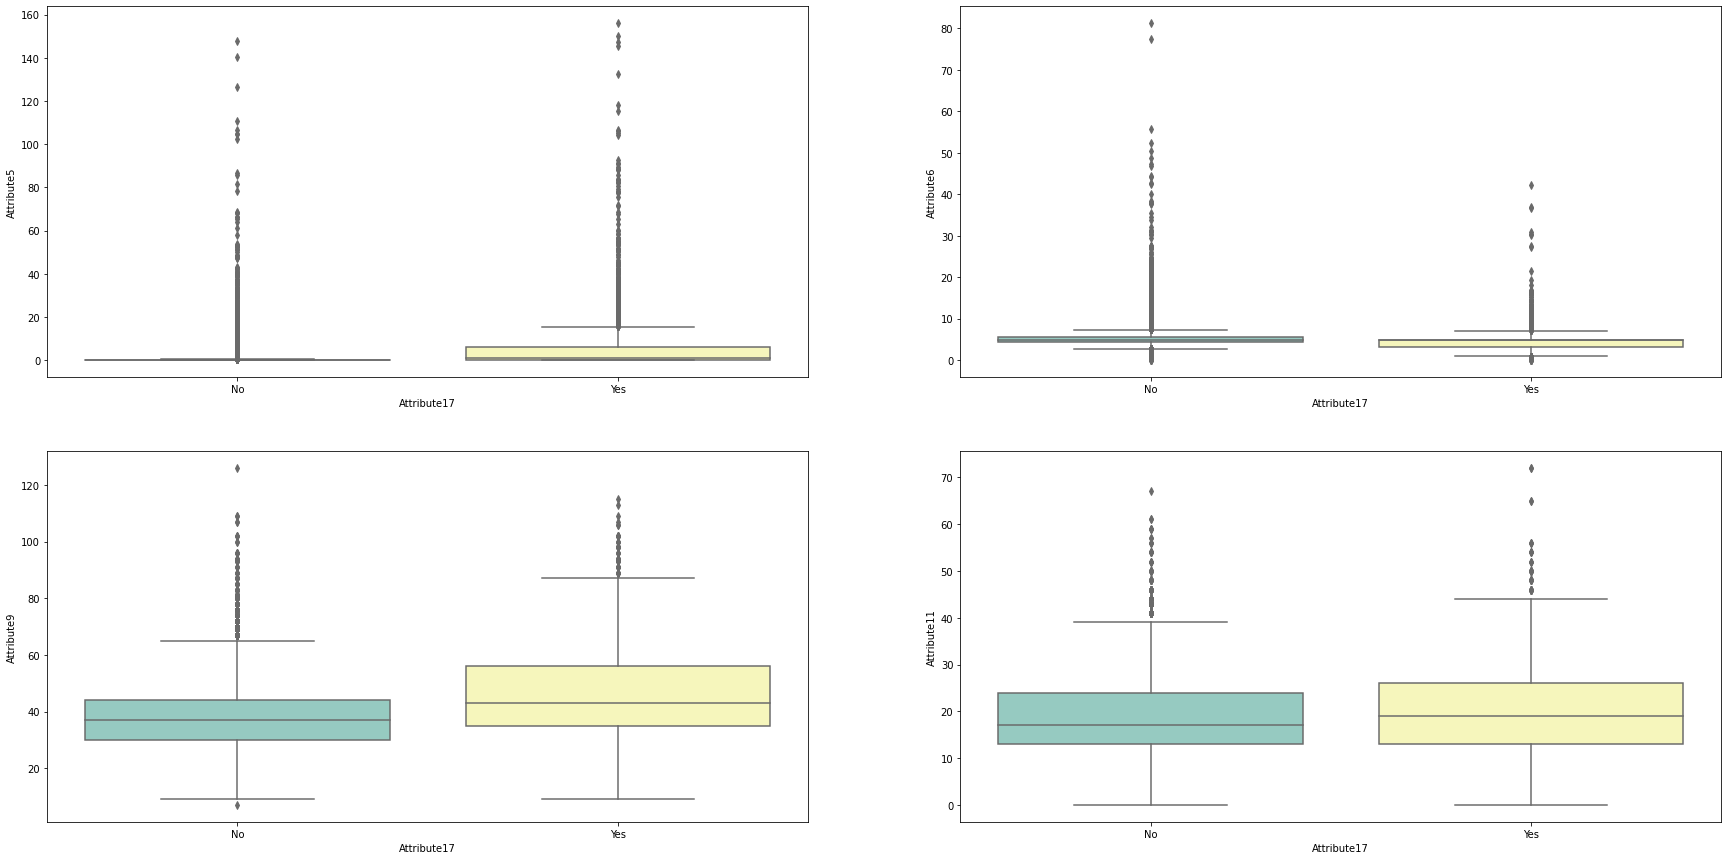

In [11]:
## Box Plot
figure, axes = plt.subplots(2, 2, figsize=(30, 15))

sns.boxplot(
    x='Attribute17', y='Attribute5', # 降雨量
    data=dataset_, ax=axes[0, 0], palette="Set3"
)

sns.boxplot(
    x='Attribute17', y='Attribute6', # 蒸發量
    data=dataset_, ax=axes[0, 1], palette="Set3"
)

sns.boxplot(
    x='Attribute17', y='Attribute9', # 最強陣風速度 
    data=dataset_, ax=axes[1, 0], palette="Set3"
)

sns.boxplot(
    x='Attribute17', y='Attribute11', # 下午三點前的平均風速
    data=dataset_, ax=axes[1, 1], palette="Set3"
)

plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

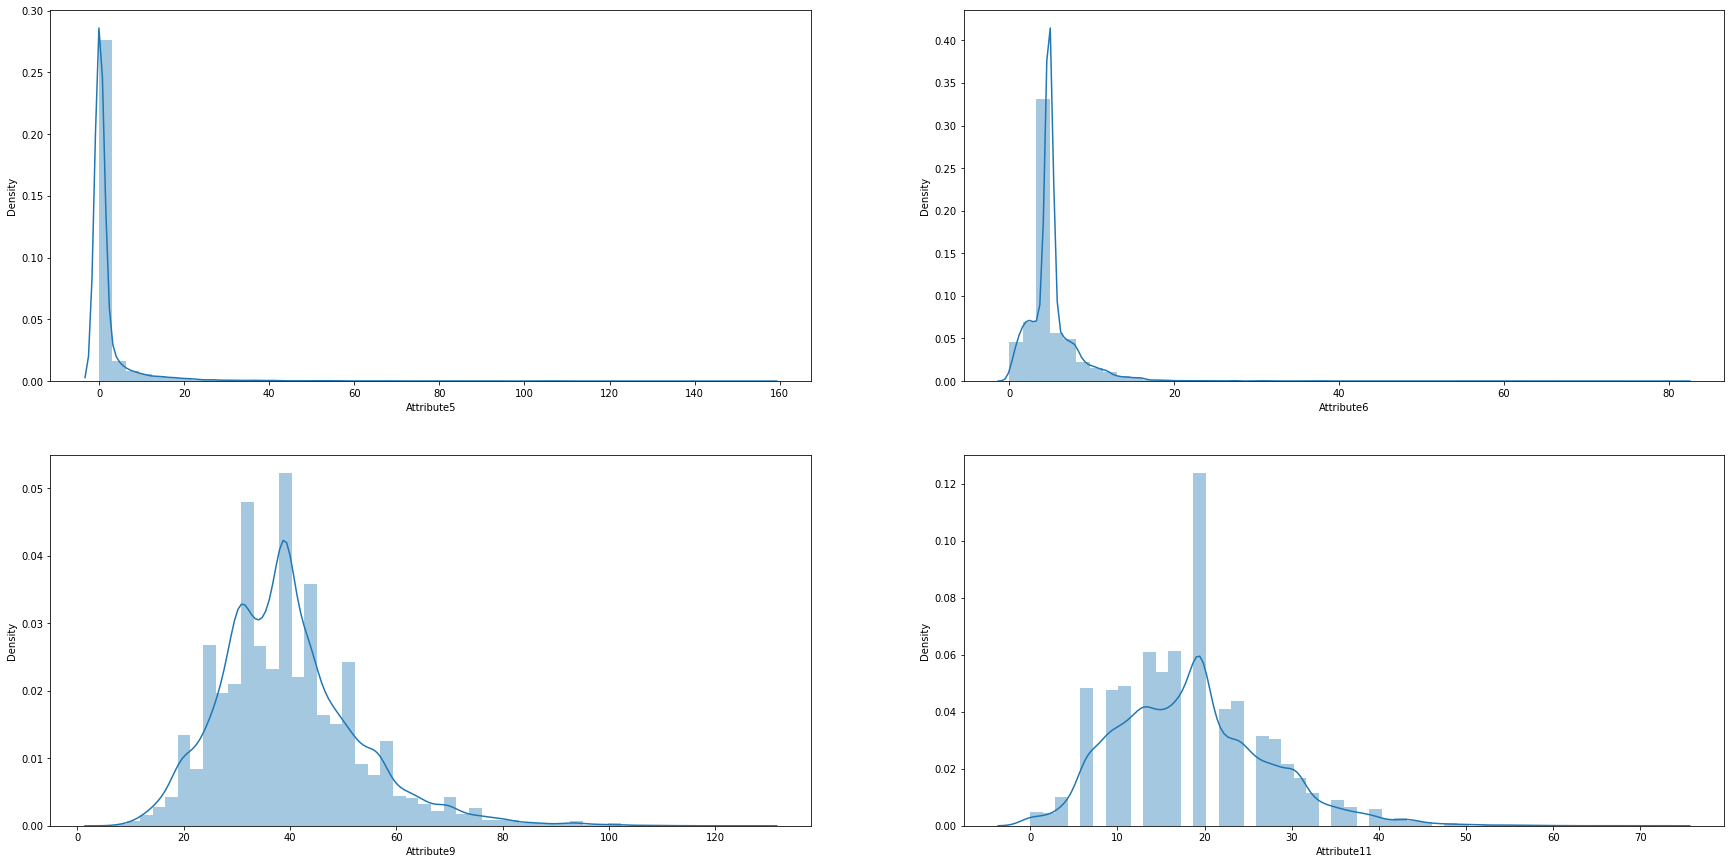

In [12]:
## Continuous Distribution Plot

figure, axes = plt.subplots(2, 2, figsize=(30, 15))

sns.distplot(
    a=dataset_['Attribute5'].dropna(), # 降雨量
    ax=axes[0, 0]
)

sns.distplot(
    a=dataset_['Attribute6'].dropna(), # 蒸發量
    ax=axes[0, 1]
)

sns.distplot(
    a=dataset_['Attribute9'].dropna(), # 最強陣風速度
    ax=axes[1, 0]
)

sns.distplot(
    a=dataset_['Attribute11'].dropna(), # 下午三點前的平均風速
    ax=axes[1, 1]
)

plt.show()

In [13]:
_list = ['Attribute5', 'Attribute6', 'Attribute9', 'Attribute11']
# 降雨量, 蒸發量, 最強陣風速度, 下午三點前的平均風速

def find_outliers(df, feature):
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    Lower_fence = df[feature].quantile(0.25) - (IQR * 3)
    Upper_fence = df[feature].quantile(0.75) + (IQR * 3)
    print('{feature} outliers are values < {lowerboundary} or > {upperboundary}'\
          .format(feature=feature, lowerboundary=Lower_fence, upperboundary=Upper_fence))
    out_of_middan = (df[feature] < Lower_fence).sum()
    out_of_top = (df[feature] > Upper_fence).sum()
    print(f'the number of upper outlier {out_of_top}')
    print(f'the number of lower outlier {out_of_middan}')
    
    
for feature in _list:
    find_outliers(dataset_, feature)
    print()


Attribute5 outliers are values < -1.7999999999999998 or > 2.4
the number of upper outlier 2644
the number of lower outlier 0

Attribute6 outliers are values < 0.5999999999999996 or > 9.0
the number of upper outlier 1326
the number of lower outlier 174

Attribute9 outliers are values < -14.0 or > 91.0
the number of upper outlier 67
the number of lower outlier 0

Attribute11 outliers are values < -20.0 or > 57.0
the number of upper outlier 11
the number of lower outlier 0



# 分割 Train 和 Test

In [14]:
from sklearn.model_selection import train_test_split

x = dataset_.drop(columns = ['Attribute17'])
y = dataset_['Attribute17']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(13682, 16) (3421, 16)
(13682,) (3421,)


# 替換離群值

In [15]:
def process_outliers_top(df3, Top, feature_):
    return np.where(df3[feature_] > Top, Top, df3[feature_])

threashold_dict = {'Attribute5': 2.4, 'Attribute6': 9, 'Attribute9': 91.0, 'Attribute11': 57.0}
_list = ['Attribute5', 'Attribute6', 'Attribute9', 'Attribute11']

for df3 in (x, X_test):
    for feature in _list:
        top = threashold_dict.get(feature)
        df3[feature] = process_outliers_top(df3, top, feature)
        
print(x[_list].max())
print(X_test[_list].max())

Attribute5      2.4
Attribute6      9.0
Attribute9     91.0
Attribute11    57.0
dtype: float64
Attribute5      2.4
Attribute6      9.0
Attribute9     91.0
Attribute11    57.0
dtype: float64


In [16]:
def process_outliers_bottom(df3, Bottom, feature_):
    return np.where(df3[feature_] < Bottom, Bottom, df3[feature_])

_list = ['Attribute6']
threashold_dict = {'Attribute6': 0.5999999999999996}

for df3 in (x, X_test):
    for feature in _list:
        bottom = threashold_dict.get(feature)
        df3[feature] = process_outliers_bottom(df3, bottom, feature)
        
print(x['Attribute6'].min())
print(X_test['Attribute6'].min())

0.5999999999999996
0.5999999999999996


# 將離散數值進行 encode

In [17]:
# 將No/Yes轉為0/1
x = x.replace({'No':0, 'Yes':1})
X_test = X_test.replace({'No':0, 'Yes':1})

y = y.replace({'No':0, 'Yes':1})
y_test = y_test.replace({'No':0, 'Yes':1})

In [18]:
from category_encoders import TargetEncoder

# 最強陣風方向, 下午三點的風向
targetencoder = TargetEncoder(cols=['Attribute8', 'Attribute10'])
x = targetencoder.fit_transform(x, y)

x.head()

/opt/conda/lib/python3.7/site-packages/category_encoders/target_encoder.py:124: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/category_encoders/target_encoder.py:129: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,month
0,2,9.2,28.0,0.0,4.8,8.6,0.154211,24.0,0.131478,9.0,16.0,1012.8,5.0,26.5,0,12
1,2,7.7,26.7,0.0,4.8,8.6,0.225724,35.0,0.207593,17.0,19.0,1010.1,5.0,25.5,0,12
2,2,15.9,21.7,2.2,4.8,8.6,0.174359,31.0,0.137665,13.0,91.0,1004.2,8.0,17.0,1,12
3,2,15.9,18.6,2.4,4.8,8.6,0.225724,61.0,0.246425,28.0,93.0,993.0,8.0,15.8,1,12
4,2,13.7,37.9,0.0,4.8,8.6,0.225724,52.0,0.237488,26.0,8.0,1006.7,5.0,36.8,0,1


In [19]:
X_test = targetencoder.transform(X_test)
X_test.head()

,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,month
9062,33,16.80,31.3,0.2,4.0,7.8,0.225724,63.0,0.123108,11.0,56.0,1014.5,8.0,27.9,0,3
5690,9,6.90,22.1,0.0,4.8,8.6,0.196828,30.0,0.207593,19.0,51.0,1017.8,8.0,18.7,0,4
10479,8,20.70,26.7,2.4,7.2,2.2,0.151965,37.0,0.159753,19.0,71.0,1017.5,7.0,24.5,1,10
13038,1,11.95,20.9,0.0,3.0,1.3,0.221409,39.0,0.236111,19.0,51.0,1024.6,5.0,21.2,0,3
6180,23,-8.00,2.1,0.0,4.8,8.6,0.166045,46.0,0.183036,11.0,56.0,1015.5,5.0,1.2,0,6


# Sampling

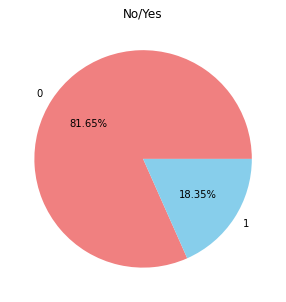

In [20]:
plt.figure( figsize=(10,5) )
y.value_counts().plot( kind='pie', colors=['lightcoral','skyblue'], autopct='%1.2f%%' )
plt.title( 'No/Yes' )
plt.ylabel( '' )
plt.show()

In [21]:
print("Original: " + str(x.shape))

## OverSampling
from imblearn.over_sampling import SMOTE
x, y = SMOTE().fit_resample(x, y)
print("After oversampling: " + str(x.shape))

## UnderSampling
from imblearn.under_sampling import TomekLinks
x, y = TomekLinks().fit_resample(x, y)
print("After oversampling and undersampling: " + str(x.shape))

Original: (17103, 16)
After oversampling: (27930, 16)
After oversampling and undersampling: (27866, 16)


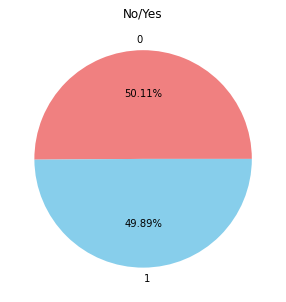

In [22]:

plt.figure( figsize=(10,5) )
y.value_counts().plot( kind='pie', colors=['lightcoral','skyblue'], autopct='%1.2f%%' )
plt.title( 'No/Yes' )  # 圖標題
plt.ylabel( '' )
plt.show()

# Logic Regression

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(n_jobs = -1)
LR.fit(x, y)

print('Test LR score: ' + str(LR.score(X_test, y_test)))

Test LR score: 0.7854428529669687


# KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors = 131)
knn.fit(x, y)

KNeighborsClassifier(n_neighbors=131)

knn_df = pd.DataFrame()

for i in range (1, 1000, 1):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x, y)
    pred = knn.predict(X_test)
    print("n: {}, accuracy, {}".format(i, accuracy_score(y_test, pred) * 10))
    knn_df = knn_df.append({"neighbors": i, "accuracy": accuracy_score(y_test, pred) * 10}, ignore_index=True)
    
plt.plot(knn_df['neighbors'], knn_df['accuracy'])
plt.xlabel('Accuracy')
plt.ylabel('Neighbors')
plt.show()

# 處理Output

In [25]:
test_data = pd.read_csv("../input/2022-data-science-hw1/test.csv")
print(test_data.isnull().sum())
test_data.head()

Attribute1     0
Attribute2     0
Attribute3     0
Attribute4     0
Attribute5     0
Attribute6     0
Attribute7     0
Attribute8     0
Attribute9     0
Attribute10    0
Attribute11    0
Attribute12    0
Attribute13    0
Attribute14    0
Attribute15    0
Attribute16    0
dtype: int64


,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16
0,2009-07-12,10,10.5,19.5,0.2,3.4,2.9,NNE,28.0,WNW,7.0,56.0,1011.5,8.0,16.8,No
1,2009-09-26,10,8.7,17.7,0.0,13.0,9.7,WSW,63.0,W,31.0,24.0,1011.4,5.0,16.3,No
2,2009-12-06,10,17.5,33.5,0.0,13.6,12.5,WSW,39.0,NW,9.0,13.0,1012.0,1.0,30.7,No
3,2010-03-22,10,18.5,30.3,0.0,8.6,11.4,S,28.0,S,13.0,18.0,1017.5,1.0,28.8,No
4,2010-05-30,10,9.4,13.3,4.6,1.8,0.0,SW,39.0,W,11.0,83.0,1007.9,7.0,13.2,Yes


In [26]:
test_data['Attribute1'] = pd.to_datetime(test_data['Attribute1'])

month = test_data['Attribute1'].dt.month
test_data['month'] = month
test_data.drop(labels=['Attribute1'], axis=1, inplace=True)

test_data = test_data.replace({'No':0, 'Yes':1})

test_data = targetencoder.transform(test_data)
test_data.head()

,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,month
0,10,10.5,19.5,0.2,3.4,2.9,0.174359,28.0,0.237488,7.0,56.0,1011.5,8.0,16.8,0,7
1,10,8.7,17.7,0.0,13.0,9.7,0.196828,63.0,0.207593,31.0,24.0,1011.4,5.0,16.3,0,9
2,10,17.5,33.5,0.0,13.6,12.5,0.196828,39.0,0.239437,9.0,13.0,1012.0,1.0,30.7,0,12
3,10,18.5,30.3,0.0,8.6,11.4,0.202566,28.0,0.191972,13.0,18.0,1017.5,1.0,28.8,0,3
4,10,9.4,13.3,4.6,1.8,0.0,0.166045,39.0,0.207593,11.0,83.0,1007.9,7.0,13.2,1,5


In [27]:
test_data.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
Attribute2,806.0,25.558313,12.719953,3.000000,3.000000,7.000000,8.000000,13.500000,27.000000,37.000000,44.000000,48.000000,48.000000
Attribute3,806.0,13.571216,6.667136,-3.700000,-0.280000,3.400000,5.200000,8.400000,13.100000,18.700000,23.100000,26.000000,28.400000
Attribute4,806.0,23.376055,7.161735,8.100000,11.105000,12.700000,13.750000,17.525000,22.750000,29.075000,33.100000,38.595000,41.900000
Attribute5,806.0,3.211911,8.553817,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.550000,8.800000,43.370000,95.200000
Attribute6,806.0,5.017494,3.219259,0.000000,0.400000,1.000000,1.400000,2.600000,4.400000,6.800000,9.000000,14.285000,28.600000
Attribute7,806.0,6.459305,4.062684,0.000000,0.000000,0.000000,0.400000,2.700000,7.000000,10.000000,11.550000,13.300000,13.500000
Attribute8,806.0,0.181166,0.043347,0.107527,0.107527,0.107527,0.121335,0.151965,0.174359,0.219675,0.239669,0.262940,0.262940
Attribute9,806.0,42.694789,14.446084,11.000000,17.000000,24.000000,28.000000,33.000000,41.000000,50.000000,61.000000,86.900000,107.000000
Attribute10,806.0,0.184134,0.039963,0.123108,0.123108,0.123108,0.131478,0.159274,0.170370,0.237488,0.240113,0.246425,0.246425
Attribute11,806.0,20.081886,9.160718,2.000000,4.000000,7.000000,9.000000,13.000000,19.000000,26.000000,31.000000,46.000000,65.000000


In [28]:
prediction = knn.predict(test_data)
print(type(prediction))
submit = pd.DataFrame()
for i in range(len(prediction)):
    submit = submit.append({'id':i, 'ans':prediction[i]}, ignore_index=True)
    
submit['id'] = submit.id.map(float)
submit = submit.replace({'No':0, 'Yes':1})
submit['ans'] = submit.ans.map(int)
print(submit.dtypes)
submit.to_csv('submission.csv', index=False)
print(submit)
print(submit.loc[:,"ans"].value_counts())

<class 'numpy.ndarray'>
id     float64
ans      int64
dtype: object
        id  ans
0      0.0    0
1      1.0    0
2      2.0    0
3      3.0    0
4      4.0    1
..     ...  ...
801  801.0    0
802  802.0    0
803  803.0    0
804  804.0    1
805  805.0    0

[806 rows x 2 columns]
1    416
0    390
Name: ans, dtype: int64
